In [123]:
from keras.datasets import imdb

In [92]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [93]:
train_labels[0]

1

In [94]:
#checking number of words
max([max(sequence) for sequence in train_data])

9999

In [95]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [96]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [132]:
import numpy as np

In [98]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [99]:
#vectorizing data sets
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [100]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [101]:
#Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
t_test = np.asarray(test_labels).astype('float32')

In [133]:
from keras import models
from keras import layers

In [103]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [104]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [134]:
from keras import optimizers

In [106]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [107]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5884 - accuracy: 0.6955 - val_loss: 0.3934 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3141 - accuracy: 0.9054 - val_loss: 0.3127 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2244 - accuracy: 0.9280 - val_loss: 0.2825 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1699 - accuracy: 0.9477 - val_loss: 0.3094 - val_accuracy: 0.8753
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1378 - accuracy: 0.9566 - val_loss: 0.2803 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1094 - accuracy: 0.9678 - val_loss: 0.2961 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0853 - accuracy: 0.9780 - val_loss: 0.3315 - val_accuracy: 0.8824
Epoch 8/20
30

In [108]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [135]:
import matplotlib.pyplot as plt

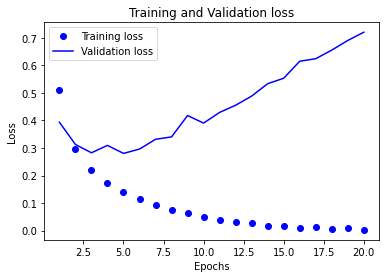

In [110]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

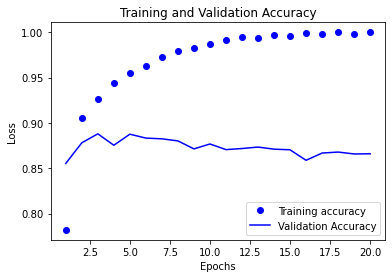

In [111]:
#Plotting the Training and Validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [112]:
#New model to prevent overfitting

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, t_test)
results

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5447 - accuracy: 0.7519
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2682 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2028 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.8807


[0.30045342445373535, 0.8806800246238708]

In [113]:
model.predict(x_test)

array([[0.13762423],
       [0.9999683 ],
       [0.8566806 ],
       ...,
       [0.12031677],
       [0.07877085],
       [0.4973558 ]], dtype=float32)

# 3.5 Classifying Newswires: Multiclassifier example

In [124]:
#importing data set
from keras.datasets import reuters

In [125]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [126]:
len(train_data)

8982

In [127]:
len(test_data)

2246

In [128]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [129]:
#Decoding back to text

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [130]:
decoded_review

"? ? ? to just br loved and you i've set and broke many was friends seems him see of how and with movies a with know that him see people film guess are of if the some to okay from without old a though a into in that film thing in that of if is scarecrow outside days a found a looks in that film these about in that was to thought 100 him see good he without be all man a character that as it"

In [131]:
train_labels[10]

3

In [136]:
def vectorize_squences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [137]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [150]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [152]:
from keras.utils.np_utils import to_categorical

In [153]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [154]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [155]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [187]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [157]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 3.0996 - accuracy: 0.3996 - val_loss: 1.6773 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4516 - accuracy: 0.7052 - val_loss: 1.2863 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0612 - accuracy: 0.7766 - val_loss: 1.1355 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8307 - accuracy: 0.8252 - val_loss: 1.0400 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6771 - accuracy: 0.8619 - val_loss: 1.0047 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5451 - accuracy: 0.8855 - val_loss: 0.9417 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4416 - accuracy: 0.9067 - val_loss: 0.9342 - val_accuracy: 0.8130
Epoch 8/20
16

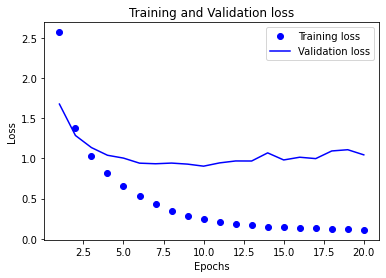

In [158]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

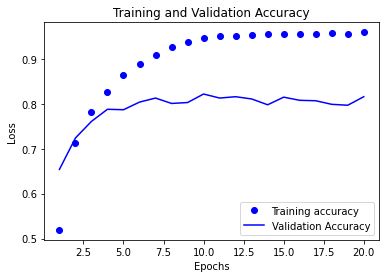

In [159]:
#Plotting the Training and Validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [164]:
#Training a new model using 9 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [165]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 3.2070 - accuracy: 0.3726 - val_loss: 1.8141 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.5867 - accuracy: 0.6848 - val_loss: 1.3544 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1284 - accuracy: 0.7544 - val_loss: 1.1594 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8494 - accuracy: 0.8162 - val_loss: 1.0512 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6765 - accuracy: 0.8625 - val_loss: 1.0014 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5448 - accuracy: 0.8928 - val_loss: 0.9547 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4500 - accuracy: 0.9103 - val_loss: 0.9120 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [167]:
results = model.evaluate(x_test,one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 0.9894 - accuracy: 0.7921


In [168]:
results

[0.9894202351570129, 0.7920747995376587]

In [169]:
predictions = model.predict(x_test)

In [175]:
predictions[1]

array([8.5964780e-03, 7.7182092e-02, 2.6795038e-03, 7.8702800e-07,
       1.2661274e-04, 9.5114773e-03, 1.2640101e-02, 4.7006377e-04,
       2.5448899e-05, 4.2857137e-04, 7.8739905e-01, 1.2284181e-03,
       1.8806127e-03, 2.0766419e-03, 1.7243281e-02, 1.0935654e-03,
       3.9219490e-04, 4.6259913e-04, 1.8649105e-02, 2.2562682e-04,
       1.4416904e-03, 2.4434750e-04, 4.4648875e-03, 1.5567587e-02,
       2.9278614e-03, 7.4807894e-03, 1.7150802e-03, 3.2293621e-05,
       2.1552132e-03, 4.3253947e-04, 9.2981959e-04, 2.7704830e-03,
       6.8686873e-04, 7.3927469e-05, 1.9818479e-03, 4.1101751e-04,
       1.9210066e-04, 2.4748319e-03, 6.1898888e-04, 4.7389918e-04,
       2.0081038e-03, 2.7467478e-03, 6.5560722e-05, 5.6144833e-03,
       1.0709625e-04, 6.9668400e-05], dtype=float32)

In [171]:
np.sum(predictions[1])

1.0000001

In [174]:
np.argmax(predictions[1])

10

In [176]:
#encoding labels using tensors

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [177]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [188]:
#Reducing number of hidden layers


model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [191]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [192]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.5498 - accuracy: 0.0823 - val_loss: 2.7168 - val_accuracy: 0.2700
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.4425 - accuracy: 0.3311 - val_loss: 1.8455 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6357 - accuracy: 0.6286 - val_loss: 1.5149 - val_accuracy: 0.6220
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3596 - accuracy: 0.6354 - val_loss: 1.4268 - val_accuracy: 0.6430
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2539 - accuracy: 0.6712 - val_loss: 1.3943 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1685 - accuracy: 0.6947 - val_loss: 1.3866 - val_accuracy: 0.6600
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0873 - accuracy: 0.7076 - val_loss: 1.3624 - val_accuracy: 0.6710
Epoch 8/20
63/63 [=

In [193]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 2.0633 - accuracy: 0.6549


In [194]:
results

[2.063275098800659, 0.6549420952796936]

In [195]:
#Accuracy drops to 65%

# 3.6 Predictingg house prices: Regression example

In [238]:
from keras.datasets import boston_housing

In [286]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [287]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [288]:
train_data.shape

(404, 13)

In [289]:
test_data.shape

(102, 13)

In [290]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [291]:
#feature normalization

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [292]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [293]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [251]:
#K-fold validation

k = 4
num_val_samples  = len(train_data) // k
num_epochs = 100
all_scores =[]

In [252]:
for i in range (k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [253]:
all_scores

[1.8989609479904175, 2.5499935150146484, 2.62563157081604, 2.45267915725708]

In [254]:
np.mean(all_scores)

2.3818162977695465

In [256]:
from keras import backend as K

K.clear_session()

In [258]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
   
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]


    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)


    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [259]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

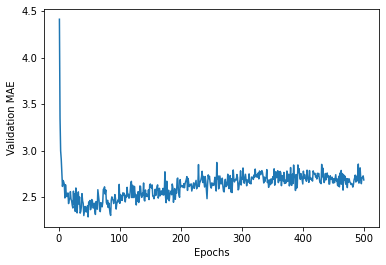

In [261]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

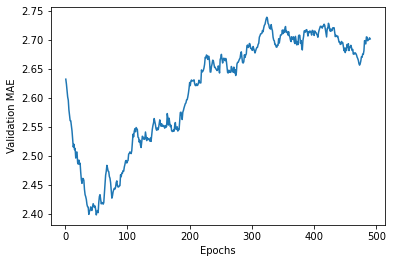

In [263]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


Model start overfitting after about 60 epochs. In my opinion, the book says around 80, but in my chart, I think is more close to 60

In [294]:
# Get a final model.
K.clear_session()
model = build_model()

model.fit(train_data, train_targets,
          epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 18.4672 - mae: 2.7068


In [295]:
test_mae_score

2.706751585006714